In [2]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,15 mins 21 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,1 month and 6 days
H2O cluster name:,H2O_started_from_R_jay_gvz146
H2O cluster total nodes:,1
H2O cluster free memory:,1.417 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [4]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")
train, valid, test = data.split_frame([0.8,0.1],seed = 69)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
print("%d/%d/%d" % (train.nrows,valid.nrows,test.nrows))

35255/4272/4451


In [7]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay","IsArrDelayed","ActualElapsedTime","Arrtime","TailNum"] #But CRSElapsedTime is fine.
xWithDep = [i for i in train.names if i not in ignoreFields]

In [9]:
xWithDep

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'CRSElapsedTime',
 'AirTime',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'IsDepDelayed']

In [6]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [10]:
m_DLR_def_python = H2ODeepLearningEstimator(variable_importances = True)
%time m_DLR_def_python.train(xWithDep,y,train,validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 730 ms, sys: 41.5 ms, total: 771 ms
Wall time: 1min 31s


In [11]:
m_DLR_def_python.model_performance(valid)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07172551177068504
RMSE: 0.2678161902699033
LogLoss: 0.22197508519338743
Mean Per-Class Error: 0.09975345515557854
AUC: 0.9700197089899403
pr_auc: 0.4803377057591902
Gini: 0.9400394179798806
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4944094140957608: 


,NO,YES,Error,Rate
NO,1664.0,269.0,0.1392,(269.0/1933.0)
YES,166.0,2173.0,0.071,(166.0/2339.0)
Total,1830.0,2442.0,0.1018,(435.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4944094,0.9090149,196.0
max f2,0.1834271,0.9380581,308.0
max f0point5,0.8336104,0.9337439,79.0
max accuracy,0.6094513,0.8998127,158.0
max precision,0.9999841,1.0,0.0
max recall,0.0193422,1.0,378.0
max specificity,0.9999841,1.0,0.0
max absolute_mcc,0.6094513,0.7986616,158.0
max min_per_class_accuracy,0.5911635,0.8986746,163.0
max mean_per_class_accuracy,0.6094513,0.9002465,158.0


Gains/Lift Table: Avg response rate: 54.75 %, avg score: 57.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1116573,1.0,1.8264215,1.8264215,1.0,1.0,1.0,1.0,0.2039333,0.2039333,82.6421548,82.6421548
,2,0.1500468,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0701154,0.2740487,82.6421548,82.6421548
,3,0.2001404,0.9999999,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0914921,0.3655408,82.6421548,82.6421548
,4,0.3000936,0.9980333,1.8264215,1.8264215,1.0,0.9996670,1.0,0.9998891,0.1825566,0.5480975,82.6421548,82.6421548
,5,0.4000468,0.9343749,1.7280429,1.8018413,0.9461358,0.9780009,0.9865418,0.9944202,0.1727234,0.7208209,72.8042869,80.1841269
,6,0.5,0.7057492,1.4072428,1.7229585,0.7704918,0.8330302,0.9433521,0.9621573,0.1406584,0.8614793,40.7242832,72.2958529
,7,0.5999532,0.4277525,0.8511894,1.5777204,0.4660422,0.5589635,0.8638314,0.8949846,0.0850791,0.9465584,-14.8810567,57.7720369
,8,0.6999064,0.1604448,0.4277334,1.4134915,0.2341920,0.2927391,0.7739130,0.8089783,0.0427533,0.9893117,-57.2266616,41.3491459
,9,0.7998596,0.0111416,0.1069333,1.2502195,0.0585480,0.0705385,0.6845186,0.7167003,0.0106883,1.0,-89.3066654,25.0219491
,10,0.8998127,0.0003032,0.0,1.1113424,0.0,0.0027537,0.6084807,0.6373936,0.0,1.0,-100.0,11.1342352


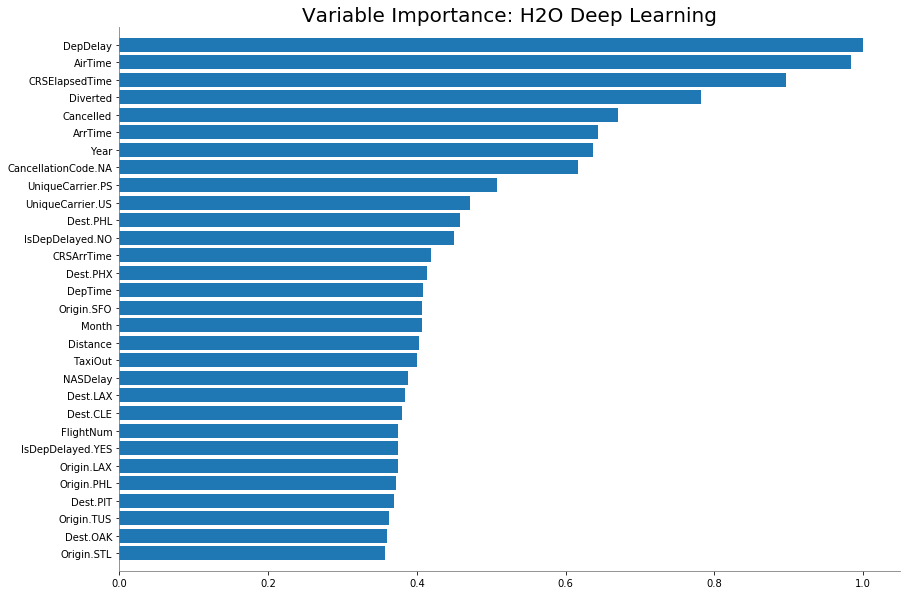

In [12]:
m_DLR_def_python.varimp_plot(30)

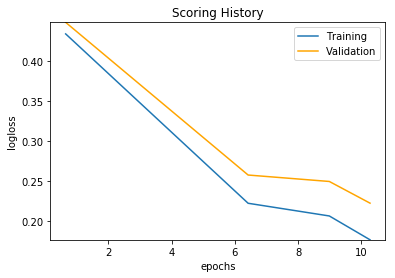

In [13]:
m_DLR_def_python.plot()